In [ ]:
# 11 均值滤波器
import cv2
import numpy as np

def mean_filter(img, K_size=3):
    # 确保是三通道的图片输入
    # np.expand_dims在第axis维，加一个维度，原有的维度推到右边去
    if len(img.shape) == 3 :
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.mean(tmp[y: y + K_size, x: x + K_size, c ])

    ## 格式处理
    # out = np.clip(out, 0, 255) # 没有进行卷积操作，不用Clip
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg")

out = mean_filter(img, K_size=3)

cv2.imwrite("myanswers/out_11.jpg",out)

In [ ]:
#12 Motion Filter
#对角线像素的平均值
import cv2
import numpy as np

def motion_filter(img, K_size=3):
    # 确保是三通道的图片输入
    # np.expand_dims在第axis维，加一个维度，原有的维度推到右边去
    if len(img.shape) == 3 :
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape

    ## Kernel
    #因为是取对角线的像素的平均值
    K = np.diag( [1] * K_size).astype(np.float32)
    K /= K_size


    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.sum(K*tmp[y: y + K_size, x: x + K_size, c ])

    ## 格式处理
    # out = np.clip(out, 0, 255) # 没有进行卷积操作，不用Clip
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg")

out = motion_filter(img, K_size=3)

cv2.imwrite("myanswers/out_12.jpg",out)


In [ ]:
#13 MAX-MIN滤波器
# 使用网格内元素的最大值&最小值的差值对网格内像素重新赋值
# 对灰度图像进行处理
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def maxmin_filter(img, K_size=3):
    
    H, W= img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    for y in range(H):
        for x in range(W):
                out[pad+y, pad+x] = np.max(tmp[y: y + K_size, x: x + K_size]) - \
                                    np.min(tmp[y: y + K_size, x: x + K_size])

    ## 格式处理
    # out = np.clip(out, 0, 255) # 没有进行卷积操作，不用Clip
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)

out = maxmin_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_13.jpg",out)

In [ ]:
#14 差分滤波器
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def differential_filter(img, K_size=3):
    
    H, W= img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    out_v = out.copy()
    out_h = out.copy()

    Kv = [[0., -1., 0.], [0., 1., 0.], [0. ,0., 0.]]
    Kh = [[0., 0., 0.], [-1., 1., 0.], [0. ,0., 0.]]
    for y in range(H):
        for x in range(W):
            out_v[pad+y, pad+x] = np.sum(Kv * tmp[y: y + K_size, x: x + K_size])
            out_h[pad+y, pad+x] = np.sum(Kh * tmp[y: y + K_size, x: x + K_size])
                
    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)

    out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
    out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out_v, out_h

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)

out_v,out_h = differential_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_14_v.jpg",out_v)
cv2.imwrite("myanswers/out_14_h.jpg",out_h)


In [ ]:
#15 Sobel滤波器
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def sobel_filter(img, K_size=3):
    
    H, W= img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    out_v = out.copy()
    out_h = out.copy()

    Kv = [[1., 2., 1.],[0., 0., 0.], [-1., -2., -1.]]
    Kh = [[1., 0., -1.],[2., 0., -2.],[1., 0., -1.]]

    for y in range(H):
        for x in range(W):
            out_v[pad+y, pad+x] = np.sum(Kv * tmp[y: y + K_size, x: x + K_size])
            out_h[pad+y, pad+x] = np.sum(Kh * tmp[y: y + K_size, x: x + K_size])
                
    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)

    out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
    out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out_v, out_h

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)

out_v,out_h = sobel_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_15_v.jpg",out_v)
cv2.imwrite("myanswers/out_15_h.jpg",out_h)


In [ ]:
#16 Prewitt滤波器
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def prewitt_filter(img, K_size=3):
    
    H, W= img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    out_v = out.copy()
    out_h = out.copy()
    
    Kv = [[-1., -1., -1.],[0., 0., 0.], [1., 1., 1.]]
    Kh = [[-1., 0., 1.],[-1., 0., 1.],[-1., 0., 1.]]

    for y in range(H):
        for x in range(W):
            out_v[pad+y, pad+x] = np.sum(Kv * tmp[y: y + K_size, x: x + K_size])
            out_h[pad+y, pad+x] = np.sum(Kh * tmp[y: y + K_size, x: x + K_size])
                
    out_v = np.clip(out_v, 0, 255)
    out_h = np.clip(out_h, 0, 255)

    out_v = out_v[pad: pad + H, pad: pad + W].astype(np.uint8)
    out_h = out_h[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out_v, out_h

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)

out_v,out_h = prewitt_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_16_v.jpg",out_v)
cv2.imwrite("myanswers/out_16_h.jpg",out_h)


In [ ]:
#17 Laplacian滤波器
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def laplacian_filter(img, K_size=3):

    H, W = img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    
    K = [[0., 1., 0.],[1., -4., 1.], [0., 1., 0.]]

    for y in range(H):
        for x in range(W):
            out[pad+y, pad+x] = np.sum(K * tmp[y: y + K_size, x: x + K_size])
                
    out = np.clip(out, 0, 255)

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)
gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = laplacian_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_17.jpg",out)


灰度图像(128,128) 使用img.shape只有两个参数

In [ ]:
#18 Emboss滤波器
import cv2
import numpy as np

def BGR2GRAY(img):
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()

    y = 0.2126*r + 0.7152*g + 0.0722*b #浮点运算，读取Img时转换成浮点类型

    y = y.astype(np.uint8)

    return y

def emboss_filter(img, K_size=3):

    H, W = img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 进行滤波；卷积操作
    tmp = out.copy()
    
    K = [[-2., -1., 0.],[-1., 1., 1.], [0., 1., 2.]]

    for y in range(H):
        for x in range(W):
            out[pad+y, pad+x] = np.sum(K * tmp[y: y + K_size, x: x + K_size])
                
    out = np.clip(out, 0, 255)

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)
gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = emboss_filter(gray, K_size=3)

cv2.imwrite("myanswers/out_18.jpg",out)

In [ ]:
#19 LoG滤波器
import cv2
import numpy as np

def LoG_filter(img, K_size=3, sigma=3):
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis = -1)
        H, W, C = img.shape

    ## Zero padding
    #H W 两侧都补零
    pad = K_size // 2
    out = np.zeros((H + pad*2, W + pad*2, C), dtype=np.float32)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float32)

    ## 计算卷积核
    K = np.zeros((K_size, K_size), dtype = np.float32)
    for y in range(-pad , -pad + K_size):
        for x in range(-pad , -pad + K_size):
                K [x + pad, y + pad] = (x**2 + y**2 + sigma**2)*np.exp(-(x**2 + y**2) / (2*sigma*sigma))
    K /= (2 * np.pi * (sigma**6))
    K /= K.sum()
    
    ## 进行滤波；卷积操作
    tmp = out.copy()
 
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])
                
    out = np.clip(out, 0, 255)

    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)
# gray = BGR2GRAY(img)
# gray_cv = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out = LoG_filter(img, K_size=3, sigma=3)

cv2.imwrite("myanswers/out_19.jpg",out)

/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


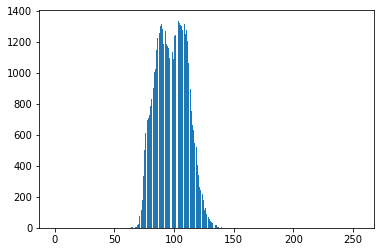

In [24]:
#20 直方图
import cv2 
import numpy as np
import matplotlib.pyplot as plt

#ravel() 将多维数组转换为一维数组；没有必要不会产生源数据的副本
img = cv2.imread("imori_dark.jpg").astype(np.float)

# Display histogram
# 输入一维数组
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("myanswers/out_20.png")
plt.show()
